In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTENC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score,plot_confusion_matrix
import imblearn
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
data=pd.read_csv('Dataset Diabetes Type1 (Total)-11.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         306 non-null    object 
 1   Sex                                         306 non-null    object 
 2   Height                                      306 non-null    float64
 3   Weight                                      306 non-null    float64
 4   BMI                                         306 non-null    float64
 5   Adequate Nutrition                          306 non-null    object 
 6   Adequate Nutrition .1                       306 non-null    object 
 7   Education of Mother                         306 non-null    object 
 8   Autoantibodies                              306 non-null    object 
 9   Impaired glucose metabolism                 306 non-null    object 
 10  Insulin taken 

In [ ]:
print("Number of null values :" , data.isnull().sum().sum())

Number of null values : 0


In [ ]:
data.describe(include='all')

,Age,Sex,Height,Weight,BMI,Adequate Nutrition,Adequate Nutrition .1,Education of Mother,Autoantibodies,Impaired glucose metabolism,Insulin taken,How Taken,Family History affected in Type 1 Diabetes,Family History affected in Type 2 Diabetes,Hypoglycemis,pancreatic disease affected in child,Affected
count,306,306,306.000000,306.000000,306.000000,306,306,306,306,306,306,306,306,306,306,306,306
unique,4,2,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2
top,greater then 15,Male,NaN,NaN,NaN,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No
freq,110,163,NaN,NaN,NaN,224,224,193,244,248,154,154,216,166,204,230,154
mean,NaN,NaN,1.349346,38.854575,20.860711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.277601,16.689427,6.225745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.440000,5.000000,10.077936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.220000,25.000000,16.928286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.420000,40.000000,19.813209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.560000,50.000000,23.711124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
{ column: len(data[column].unique())for column in data.columns}

{'Age': 4,
 'Sex': 2,
 'Height': 71,
 'Weight': 68,
 'BMI': 257,
 'Adequate Nutrition ': 2,
 'Adequate Nutrition .1': 2,
 'Education of Mother': 2,
 'Autoantibodies': 2,
 'Impaired glucose metabolism ': 2,
 'Insulin taken': 2,
 'How Taken': 2,
 'Family History affected in Type 1 Diabetes': 2,
 'Family History affected in Type 2 Diabetes': 2,
 'Hypoglycemis': 2,
 'pancreatic disease affected in child ': 2,
 'Affected': 2}

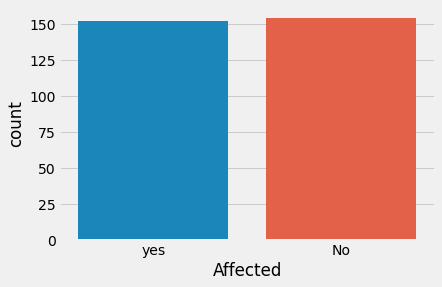

In [ ]:
sns.countplot(x='Affected',data=data)

In [ ]:
def preprocessing(df):
    df= df.copy()
    
    # Gender column Binary Encoding
    df['Sex'] = df ['Sex'].replace({'Female':0,'Male':1 })
    df['Age'] = df ['Age'].replace({'Less then 11': 10, 'Less then 15': 13, 'greater then 15': 50, 'Less then 5': 4})
    
    
    #Symptom Column Binary Encoding
    for column in df.columns.drop(['Age','Sex','Affected']):
     df[column]= df[column].replace({'No':0 , 'Yes': 1,'no':0,'none':1,'Injection':1})
    
    #train
    y=df["Affected"]
    X=df.drop("Affected", axis=1)
    
    #test_train_split
    X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=1)
    
    #StandardScaler
    scaler=StandardScaler()
    scaler.fit(X_train)
    X_train=pd.DataFrame(scaler.transform(X_train),index=X_train.index , columns=X_train.columns)
    X_test=pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns=X_test.columns)
    
    return X_train,X_test,y_train,y_test

In [ ]:
X_train,X_test,y_train,y_test= preprocessing(data)

In [ ]:
X_train

,Age,Sex,Height,Weight,BMI,Adequate Nutrition,Adequate Nutrition .1,Education of Mother,Autoantibodies,Impaired glucose metabolism,Insulin taken,How Taken,Family History affected in Type 1 Diabetes,Family History affected in Type 2 Diabetes,Hypoglycemis,pancreatic disease affected in child
34,1.351707,-1.077783,0.668493,1.431559,0.921028,0.588143,0.588143,-1.389787,-1.965613,-0.457208,1.028442,1.028442,-0.588143,-0.945413,1.449638,-0.573753
191,-0.590023,0.927831,0.489223,0.348293,-0.123582,0.588143,0.588143,0.719535,0.508747,2.187186,-0.972345,-0.972345,1.700267,-0.945413,-0.689828,-0.573753
261,-0.747460,0.927831,-2.630075,-1.457150,3.118825,0.588143,0.588143,0.719535,0.508747,-0.457208,-0.972345,-0.972345,-0.588143,-0.945413,-0.689828,-0.573753
150,-0.747460,-1.077783,0.345807,0.589019,0.382639,-1.700267,-1.700267,0.719535,0.508747,2.187186,1.028442,1.028442,-0.588143,1.057739,-0.689828,-0.573753
208,-0.590023,0.927831,0.560931,1.852829,1.609675,0.588143,0.588143,0.719535,0.508747,-0.457208,-0.972345,-0.972345,-0.588143,-0.945413,-0.689828,-0.573753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.747460,-1.077783,-0.909083,-1.096061,-0.594160,0.588143,0.588143,0.719535,0.508747,-0.457208,-0.972345,-0.972345,-0.588143,-0.945413,-0.689828,-0.573753
255,-0.590023,0.927831,-0.622251,-0.554428,0.101334,0.588143,0.588143,0.719535,0.508747,-0.457208,-0.972345,-0.972345,-0.588143,1.057739,-0.689828,-0.573753
72,1.351707,-1.077783,0.632639,2.755550,2.541192,-1.700267,-1.700267,-1.389787,-1.965613,-0.457208,1.028442,1.028442,-0.588143,-0.945413,1.449638,-0.573753
235,-0.747460,-1.077783,-0.801521,-0.915517,-0.355112,0.588143,0.588143,0.719535,0.508747,-0.457208,-0.972345,-0.972345,-0.588143,1.057739,-0.689828,-0.573753


In [ ]:
y_test

89     yes
58     yes
70     yes
305     No
112    yes
      ... 
107    yes
106    yes
67     yes
139    yes
188     No
Name: Affected, Length: 92, dtype: object

In [ ]:
model=SVC().fit(X_train,y_train)
print('SVC(): trained')

SVC(): trained


In [ ]:
print("Accuracy of SVM: {:.2f}%".format(model.score(X_test,y_test) * 100))


Accuracy of SVM: 100.00%


In [ ]:
scaler = StandardScaler()

In [ ]:
#X=df.drop("Affected", axis=1)
scaler.fit(X_train)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X_train)

In [ ]:
print(standardized_data)

[[ 1.35170653 -1.07778298  0.66849275 ... -0.94541277  1.44963764
  -0.57375304]
 [-0.59002284  0.92783057  0.48922277 ... -0.94541277 -0.68982756
  -0.57375304]
 [-0.74746036  0.92783057 -2.63007499 ... -0.94541277 -0.68982756
  -0.57375304]
 ...
 [ 1.35170653 -1.07778298  0.63263875 ... -0.94541277  1.44963764
  -0.57375304]
 [-0.74746036 -1.07778298 -0.80152113 ...  1.05773904 -0.68982756
  -0.57375304]
 [-0.59002284  0.92783057  0.27409878 ...  1.05773904  1.44963764
   1.74291017]]


In [ ]:
X = standardized_data
Y = data['Affected']

In [ ]:
print(X)
print(Y)

[[ 1.35170653 -1.07778298  0.66849275 ... -0.94541277  1.44963764
  -0.57375304]
 [-0.59002284  0.92783057  0.48922277 ... -0.94541277 -0.68982756
  -0.57375304]
 [-0.74746036  0.92783057 -2.63007499 ... -0.94541277 -0.68982756
  -0.57375304]
 ...
 [ 1.35170653 -1.07778298  0.63263875 ... -0.94541277  1.44963764
  -0.57375304]
 [-0.74746036 -1.07778298 -0.80152113 ...  1.05773904 -0.68982756
  -0.57375304]
 [-0.59002284  0.92783057  0.27409878 ...  1.05773904  1.44963764
   1.74291017]]
0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
301     No
302     No
303     No
304     No
305     No
Name: Affected, Length: 306, dtype: object


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
data.drop("Affected", axis=1)

,Age,Sex,Height,Weight,BMI,Adequate Nutrition,Adequate Nutrition .1,Education of Mother,Autoantibodies,Impaired glucose metabolism,Insulin taken,How Taken,Family History affected in Type 1 Diabetes,Family History affected in Type 2 Diabetes,Hypoglycemis,pancreatic disease affected in child
0,greater then 15,Female,1.50,56.0,24.888889,No,No,No,Yes,Yes,Yes,Injection,Yes,No,Yes,Yes
1,greater then 15,Female,1.48,58.0,26.479182,No,No,No,Yes,No,Yes,Injection,Yes,Yes,Yes,Yes
2,Less then 11,Female,1.20,46.0,31.944444,Yes,Yes,No,Yes,No,Yes,Injection,Yes,No,No,No
3,Less then 15,Female,1.65,50.0,18.365473,Yes,Yes,No,No,No,Yes,Injection,No,Yes,No,No
4,Less then 15,Female,1.61,59.0,22.761468,Yes,Yes,Yes,Yes,No,Yes,Injection,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Less then 11,Male,1.01,12.0,11.763553,Yes,Yes,Yes,Yes,No,No,No,No,Yes,No,No
302,Less then 11,Female,0.92,12.0,14.177694,Yes,Yes,Yes,Yes,No,No,No,No,Yes,No,No
303,Less then 5,Female,0.61,7.0,18.812147,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No
304,Less then 11,Female,0.92,12.0,14.177694,Yes,Yes,Yes,Yes,No,No,No,No,Yes,No,No


In [ ]:
input_data = (50,0,1.4,45,22.95918367,0,0,0,0,0,1,1,0,0,1,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 'no'):
  print('The person is not diabetic')
else:
  print('The person is type-1 diabetic')

[[ 5.00000000e+01 -1.66014658e-17  1.40000000e+00  4.50000000e+01
   2.29591837e+01  5.81051303e-17  5.81051303e-17  1.24510993e-17
  -5.39547638e-17  2.49021987e-17  1.00000000e+00  1.00000000e+00
  -3.32029316e-17  3.32029316e-17  1.00000000e+00  1.00000000e+00]]
['yes']
The person is type-1 diabetic


In [ ]:
data1=pd.read_csv('diabetes_dataset__2019_Type2.csv')

In [ ]:
for col in data1.columns:
    print(col)
    print(data1[col].value_counts())
    print(f'-'*20)

Age
less than 40    488
40-49           164
50-59           156
60 or older     144
Name: Age, dtype: int64
--------------------
Gender
Male      580
Female    372
Name: Gender, dtype: int64
--------------------
Family_Diabetes
no     498
yes    454
Name: Family_Diabetes, dtype: int64
--------------------
highBP
no     724
yes    228
Name: highBP, dtype: int64
--------------------
PhysicallyActive
less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64
--------------------
BMI
24.0    111
21.0     88
23.0     76
28.0     71
26.0     66
33.0     64
27.0     63
22.0     58
20.0     48
19.0     36
25.0     34
30.0     33
18.0     32
29.0     28
38.0     28
36.0     20
17.0     16
32.0     16
31.0     16
34.0     12
35.0     12
15.0      8
39.0      4
40.0      4
42.0      3
45.0      1
Name: BMI, dtype: int64
--------------------
Smoking
no     844
yes    108
Name: Smoking, dtype: int64
----------

In [ ]:
data1['RegularMedicine'].replace('o','no', inplace=True)
data1['BPLevel'] = data1['BPLevel'].str.lower().str.strip()
data1['Pdiabetes'].replace('0', 'no', inplace=True)
data1['Diabetic'] = data1['Diabetic'].str.strip()
# there is nan value at pregancies column where gender is male 
# if these values are replaced with 0, there's only 26 values, so all nan values will be replaced with 0. 
data1[data1['Gender']=='Male']['Pregancies'].isna().sum()

16

In [ ]:
data1['Pregancies'].replace(np.nan, 0, inplace=True)
# will drop all na's 
data1.dropna(inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               947 non-null    object 
 1   Gender            947 non-null    object 
 2   Family_Diabetes   947 non-null    object 
 3   highBP            947 non-null    object 
 4   PhysicallyActive  947 non-null    object 
 5   BMI               947 non-null    float64
 6   Smoking           947 non-null    object 
 7   Alcohol           947 non-null    object 
 8   Sleep             947 non-null    int64  
 9   SoundSleep        947 non-null    int64  
 10  RegularMedicine   947 non-null    object 
 11  JunkFood          947 non-null    object 
 12  Stress            947 non-null    object 
 13  BPLevel           947 non-null    object 
 14  Pregancies        947 non-null    float64
 15  Pdiabetes         947 non-null    object 
 16  UriationFreq      947 non-null    object 
 1

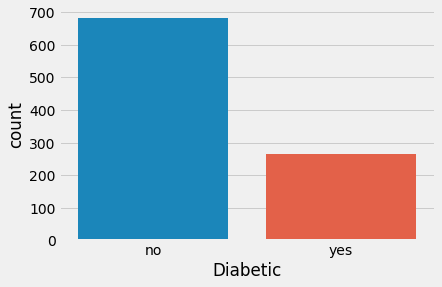

In [ ]:
sns.countplot(x='Diabetic',data=data1)

In [ ]:
num_cols = ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']
category_cols = list(set(data1.columns).difference(set(num_cols)))

data_clean = pd.DataFrame()
for col in num_cols: 
    data_clean[col] = data1[col].astype('int')

for col in category_cols: 
    data_clean[col] = data1[col].astype('category')

# categorical variables in pandas is a little tricky. 
# I want to order the categorical variables according to the risks. 
data_clean['Age'] = pd.Categorical(data1['Age'], ordered=True, 
                                   categories=['less than 40', '40-49', '50-59', '60 or older'])
data_clean['PhysicallyActive'] = pd.Categorical(data1['PhysicallyActive'], ordered=True, 
                                                categories=['one hr or more', 'more than half an hr', 'less than half an hr', 'none'])
data_clean['JunkFood'] = pd.Categorical(data1['JunkFood'], ordered=True, categories=['occasionally', 'often', 'very often', 'always'])
data_clean['BPLevel'] = pd.Categorical(data1['BPLevel'], ordered=True, 
                                       categories=['low', 'normal', 'high'])
data_clean['Stress'] = pd.Categorical(data1['Stress'], ordered=True, 
                                      categories=['not at all', 'sometimes', 'very often', 'always'])

# sklearn cannot map according to this order and so do it manually. 
category_mapping = {
    'Age':{'less than 40':0, '40-49':1, '50-59':2, '60 or older':3},
    'Family_Diabetes':{'no':0, 'yes':1},
    'Gender':{'Female':0, 'Male':1},
    'Smoking':{'no':0, 'yes':1},
    'Pdiabetes':{'no':0, 'yes':1},
    'RegularMedicine':{'no':0, 'yes':1},
    'PhysicallyActive':{'one hr or more':0, 'more than half an hr':1, 'less than half an hr':2, 'none':3},
    'JunkFood':{'occasionally':0, 'often':1, 'very often':2, 'always':3},
    'BPLevel':{'low':0, 'normal':1, 'high':2},
    'highBP':{'no':0, 'yes':1},
    'Alcohol':{'no':0, 'yes':1},
    'UriationFreq':{'not much':0, 'quite often':1},
    'Stress':{'not at all':0, 'sometimes':1, 'very often':2, 'always':3},
    'Diabetic':{'no':0, 'yes':1},
}

for col in category_cols:
    data_clean[col] = data_clean[col].map(category_mapping[col])

In [ ]:
data_clean.head()

,BMI,Sleep,SoundSleep,Pregancies,highBP,Alcohol,Stress,Family_Diabetes,Age,RegularMedicine,BPLevel,Gender,PhysicallyActive,JunkFood,Diabetic,UriationFreq,Pdiabetes,Smoking
0,39,8,6,0,1,0,1,0,2,0,2,1,0,0,0,0,0,0
1,28,8,6,0,1,0,1,0,2,1,1,1,2,2,0,0,0,0
2,24,6,6,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0
3,23,8,6,0,0,0,1,0,2,0,1,1,0,0,0,0,0,0
4,27,8,8,0,0,0,1,0,1,0,1,1,2,0,0,0,0,0


In [ ]:
data_clean['Diabetic'].value_counts()

0    682
1    265
Name: Diabetic, dtype: int64

In [ ]:
# split the data 
x = data_clean.drop('Diabetic', axis=1)
Y = data_clean['Diabetic']
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=123, stratify=Y)

In [ ]:
print(Y_train.value_counts())
print(Y_test.value_counts())

0    545
1    212
Name: Diabetic, dtype: int64
0    137
1     53
Name: Diabetic, dtype: int64


In [ ]:
# The data is imbalanced and I will use smote
def smote_data(x, Y):
    smotenc = SMOTENC(random_state = 123, categorical_features = list(range(4, 17)), n_jobs=-1)
    x_smote, Y_smote = smotenc.fit_resample(x, Y)
    return x_smote, Y_smote 

x_train_smote, Y_train_smote = smote_data(x_train, Y_train)
x_test_smote, Y_test_smote = smote_data(x_test, Y_test)

In [ ]:
print(Y_train_smote.value_counts())
print(Y_test_smote.value_counts())

0    545
1    545
Name: Diabetic, dtype: int64
0    137
1    137
Name: Diabetic, dtype: int64


In [ ]:
def grid_search(X_tr, X_te, y_tr, y_te, model, params, scoring='recall'):
    gs = GridSearchCV(estimator = model, param_grid = params, scoring = scoring, n_jobs=-1, cv=3)
    gs.fit(X_tr, y_tr)
    y_pred = gs.predict(X_te)
    print(f"{model}")
    print(f"Best parameter      : {gs.best_params_}")
    print(f"Test Accuracy Score : {accuracy_score(y_te, y_pred)}")
    print(f"Train Accuracy Score: {accuracy_score(y_tr, gs.predict(X_tr))}")
    print(f"Recall score        : {recall_score(y_te, y_pred)}")
    print(f"Classification Report \n{'-'*30}\n {classification_report(y_te, y_pred)}")
    return gs.best_params_

In [ ]:
model = SVC(random_state=123)
params = {
    'C' : [0.001, 0.01, 0.1, 1, 10],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [2, 3, 4, 5]
}
svc_best = grid_search(x_train_smote, x_test, Y_train_smote, Y_test, model, params, scoring='accuracy')

SVC(random_state=123)
Best parameter      : {'C': 10, 'degree': 4, 'kernel': 'poly'}
Test Accuracy Score : 0.8526315789473684
Train Accuracy Score: 0.9100917431192661
Recall score        : 0.8867924528301887
Classification Report 
------------------------------
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       137
           1       0.68      0.89      0.77        53

    accuracy                           0.85       190
   macro avg       0.82      0.86      0.83       190
weighted avg       0.88      0.85      0.86       190



In [ ]:
Scaler = StandardScaler()

In [ ]:
Scaler.fit(x_train_smote)

StandardScaler()

In [ ]:
standardized__data = Scaler.transform(x_train_smote)

In [ ]:
K = standardized_data
Z = data1['Diabetic']

In [ ]:
print(K)
print(Z)

[[ 1.35170653 -1.07778298  0.66849275 ... -0.94541277  1.44963764
  -0.57375304]
 [-0.59002284  0.92783057  0.48922277 ... -0.94541277 -0.68982756
  -0.57375304]
 [-0.74746036  0.92783057 -2.63007499 ... -0.94541277 -0.68982756
  -0.57375304]
 ...
 [ 1.35170653 -1.07778298  0.63263875 ... -0.94541277  1.44963764
  -0.57375304]
 [-0.74746036 -1.07778298 -0.80152113 ...  1.05773904 -0.68982756
  -0.57375304]
 [-0.59002284  0.92783057  0.27409878 ...  1.05773904  1.44963764
   1.74291017]]
0       no
1       no
2       no
3       no
4       no
      ... 
947    yes
948    yes
949     no
950     no
951    yes
Name: Diabetic, Length: 947, dtype: object


In [ ]:
Classifier = svm.SVC(kernel='linear')

In [ ]:
Classifier.fit(x_train, Y_train)

SVC(kernel='linear')

In [ ]:
input__data = (2,1,1,1,2,28,0,0,6,1,2,1,1,0,0,0,0)

# changing the input_data to numpy array
input_data_numpyarray = np.asarray(input__data)

# reshape the array as we are predicting for one instance
input__datareshaped = input_data_numpyarray.reshape(1,-1)

# standardize the input data
std__data = Scaler.transform(input__datareshaped)
print(std__data)

predictions = Classifier.predict(std__data)
print(predictions)

if (predictions[0] == 1):
  print('The person is not diabetic')
else:
  print('The person is type-2 diabetic')

[[-4.42941635 -4.6078873  -2.31735064  0.59222614  3.58193294 69.13886886
  -1.51338628 -1.14854209  4.19641672  0.97642461  1.42047285  0.82746517
  -0.34633289 -0.52338689 -0.68773031 -0.11812488 -0.36638118]]
[0]
The person is type-2 diabetic


In [ ]:
if prediction[0]=='no' and predictions[0]==1:
  print("Result --> Patient is not diabetic")
if prediction[0]=='no' and predictions[0]==0:
  print("Result --> Patient is Type-2 diabetic")
if prediction[0]=='yes' and predictions[0]==1:
  print("Result --> Patient is Type-1 diabetic")
if prediction[0]=='yes' and predictions[0]==0:
  print("Result --> Pateint is Double diabetic")

Result --> Pateint is Double diabetic
